In [3]:
library(tidyverse,quietly = T)
library(caret,quietly = T)
library(AppliedPredictiveModeling,quietly = T)
library(Rtsne,quietly = T)
library(dplyr,quietly = T)
.libPaths("/root/R/x86_64-conda_cos6-linux-gnu-library/3.5")
library(cluster,quietly = T)
library(fpc,quietly = T)
library(caret,quietly = T)
require(randomForest,quietly = T)
library(ROCR,quietly = T)
library(reshape,quietly = T)
library(ggpubr,quietly = T)

In [4]:
#head(cancer_cases)

[1]  863 2210

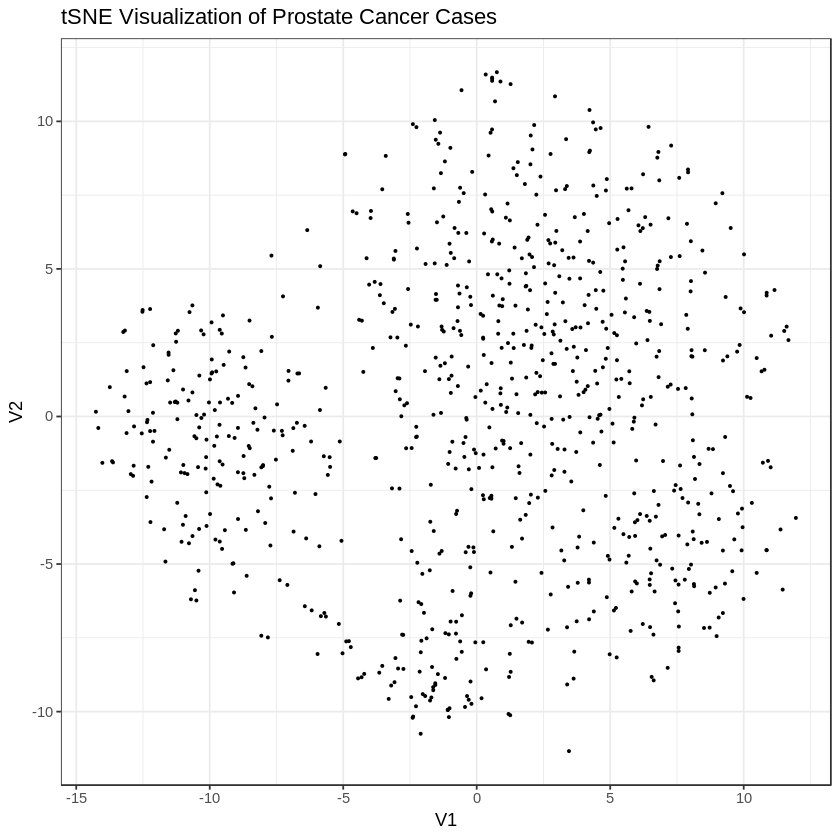

In [5]:
mccs_ess <- read.csv("/data/gunaseka/ESS_MCCS_Analysis/ess_mccs_data.csv",stringsAsFactors=FALSE)
ess_siv_probs <- read.csv("/data/gunaseka/ESS_MCCS_Analysis/ESS_SIV_Probes.csv")
cancer_cases <- mccs_ess[mccs_ess$CancerCellType=='PC' & mccs_ess$CaseControl==1,]
cancer_control <- mccs_ess[mccs_ess$CancerCellType=="PC" & mccs_ess$CaseControl==0,]
cancer_cases_methy<- cancer_cases[,ess_siv_probs$CG]

dim(cancer_cases_methy)
nums <- unlist(lapply(cancer_cases_methy, is.numeric))
cancer_cases_methy <- cancer_cases_methy[,nums]
cancer_cases_methy <- cancer_cases_methy[ , colSums(is.na(cancer_cases_methy)) == 0]

set.seed(9)
tsne_model_3 = Rtsne(as.matrix(cancer_cases_methy), check_duplicates=T, pca=T, perplexity=30, theta=0.5, dims=2)
d_tsne_3 = as.data.frame(tsne_model_3$Y)

ggplot(d_tsne_3, aes(x=V1, y=V2)) +
  geom_point(size=0.45) +
  guides(colour=guide_legend(override.aes=list(size=6))) +
  xlab("V1") + ylab("V2") +theme_bw()+
  ggtitle("tSNE Visualization of Prostate Cancer Cases") +
  scale_colour_brewer(palette = "Set2")

DBSCAN clustering for 863 objects.
Parameters: eps = 1.5, minPts = 15
The clustering contains 3 cluster(s) and 106 noise points.

  0   1   2   3 
106 474 116 167 

Available fields: cluster, eps, minPts

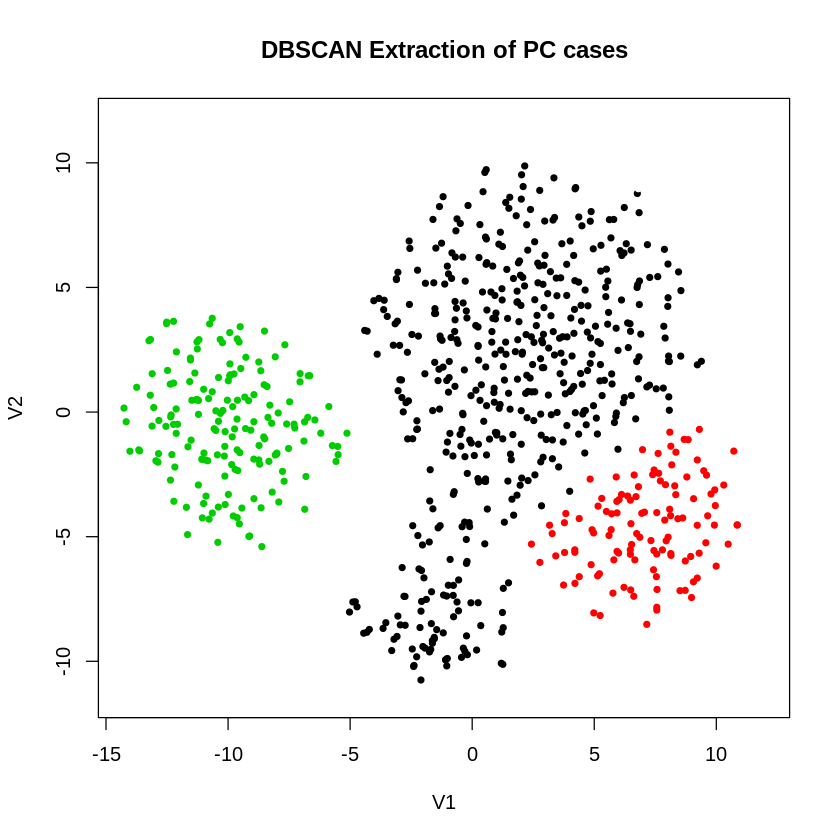

In [6]:
res <- dbscan::dbscan(d_tsne_3,eps = 1.5, minPts = 15)
plot(d_tsne_3, col=res$cluster, pch = 20,main="DBSCAN Extraction of PC cases")
#points(d_tsne_1[res$cluster == 0L], col = "grey", pch = "+")
res

In [7]:
d_tsne_3$cluster <- res$cluster
d_tsne_3$ID <- cancer_cases$ID
head(d_tsne_3) 

V1,V2,cluster,ID
-1.3959189,-4.6476141,1,PC_Pair_1
-14.2628937,0.1604518,3,PC_Pair_2
3.5794374,2.9629831,1,PC_Pair_3
5.9716910,-1.4912276,1,PC_Pair_4
6.3676282,3.5761073,1,PC_Pair_5
0.5680226,5.9295431,1,PC_Pair_6


In [8]:
tsne_model_cluster1 <- d_tsne_3[d_tsne_3$cluster==1,]
tsne_model_cluster2 <- d_tsne_3[d_tsne_3$cluster==2,]
tsne_model_cluster3 <- d_tsne_3[d_tsne_3$cluster==3,]



In [9]:
cancer_cases_controls_avg <- read.csv("/data/gunaseka/ESS_MCCS_Analysis/averaged_accros_cluster.csv")
cancer_cases_avg <- cancer_cases_controls_avg[cancer_cases_controls_avg$CancerCellType=="PC" & cancer_cases_controls_avg$CaseControl==1,]
cancer_controls_avg <- cancer_cases_controls_avg[cancer_cases_controls_avg$CancerCellType=="PC" & cancer_cases_controls_avg$CaseControl==0,]

In [10]:
cluster1_cases <- cancer_cases_avg[cancer_cases_avg$ID %in% tsne_model_cluster1$ID, ]
cluster2_cases <- cancer_cases_avg[cancer_cases_avg$ID %in% tsne_model_cluster2$ID, ]
cluster3_cases <- cancer_cases_avg[cancer_cases_avg$ID %in% tsne_model_cluster3$ID, ]

cluster1_controls <- cancer_controls_avg[cancer_controls_avg$ID %in% tsne_model_cluster1$ID,]
cluster2_controls <- cancer_controls_avg[cancer_controls_avg$ID %in% tsne_model_cluster2$ID,]
cluster3_controls <- cancer_controls_avg[cancer_controls_avg$ID %in% tsne_model_cluster3$ID,]

## Cases in Cluster 1  and matching controls

In [11]:
head(cluster1_cases)
head(cluster1_controls)

,Sample,CancerCellType,CaseControl,ID,AlcoholAmount,Smoking,bcell,bmi_rrto,cd4t,cd8t,⋯,VIPR2,VTRNA2.1,WDR27,WDR90,ZFP57,ZFYVE28,ZNF251,ZNF681,ZNF714,ZNF890P
4350,Sample_4350,PC,1,PC_Pair_1,2,Never,0.03124907,28.51924,0.4788985,0.00000000,⋯,1.2262072,0.8556876,1.0768256,-0.9672918,2.2953312,3.557203,1.5330157,-1.744068,0.5329113,0.968932779
4353,Sample_4353,PC,1,PC_Pair_3,1,Never,0.10082223,30.05003,0.1844862,0.12306696,⋯,1.6851114,0.1400600,0.6258309,-0.1437234,3.1403654,2.954671,1.9219780,-3.259399,0.1057944,0.002889846
4355,Sample_4355,PC,1,PC_Pair_4,2,Former,0.06004972,27.90445,0.1091810,0.07194285,⋯,2.4120595,0.5453855,0.7982160,-0.9299917,3.1558635,3.003048,0.5877212,-2.936598,0.8860706,0.326238155
4358,Sample_4358,PC,1,PC_Pair_5,1,Never,0.11303621,26.42713,0.1657279,0.08150207,⋯,2.2369826,0.5265385,0.8642715,-0.5512491,0.8518819,3.064723,-0.9403711,-3.147413,-3.2661796,-1.392128455
4360,Sample_4360,PC,1,PC_Pair_6,4,Never,0.08055555,41.52421,0.1275946,0.09060549,⋯,-0.4110105,0.4845656,0.7149950,-0.7424551,1.6664075,2.882332,1.9814976,-3.757477,0.7106879,0.289179001
4364,Sample_4364,PC,1,PC_Pair_8,1,Never,0.06817594,26.79123,0.3080299,0.15967438,⋯,2.3224883,0.5681482,0.4236015,0.8411062,1.1290718,3.737171,0.5636090,-1.874462,-2.6261978,-0.093592184


,Sample,CancerCellType,CaseControl,ID,AlcoholAmount,Smoking,bcell,bmi_rrto,cd4t,cd8t,⋯,VIPR2,VTRNA2.1,WDR27,WDR90,ZFP57,ZFYVE28,ZNF251,ZNF681,ZNF714,ZNF890P
4349,Sample_4349,PC,0,PC_Pair_1,2,Never,0.02630550,23.80933,0.12668227,0.03316347,⋯,1.5457311,0.5469304,0.4910751,-1.7315195,0.8757137,3.082579,0.9575129,-3.435569,0.2141593,0.24575722
4354,Sample_4354,PC,0,PC_Pair_3,4,Never,0.05037990,25.58598,0.17959327,0.08882190,⋯,3.5004475,0.5856435,0.4211313,-1.4144366,3.2269144,3.245901,1.3239087,-3.986961,-1.7764825,-0.09075481
4356,Sample_4356,PC,0,PC_Pair_4,1,Never,0.11050807,30.67739,0.18013556,0.11107306,⋯,1.9433960,0.7128411,0.9361930,-0.1942653,3.0680312,3.059673,0.5933022,-3.817015,0.7982271,0.68652489
4357,Sample_4357,PC,0,PC_Pair_5,4,Former,0.04248149,29.10325,0.06717147,0.17098801,⋯,1.8049348,0.8185096,0.6725335,0.4012593,1.8933872,2.858437,1.1962743,-3.069210,0.7699756,-1.87176098
4359,Sample_4359,PC,0,PC_Pair_6,3,Former,0.09378724,28.26854,0.18097590,0.17949657,⋯,0.8035994,0.7665506,1.0434265,0.1836838,2.9495923,3.159290,1.6828115,-3.790084,-0.2694896,1.59295572
4363,Sample_4363,PC,0,PC_Pair_8,2,Current,0.05813113,26.67719,0.14146970,0.02430881,⋯,2.4150536,0.4420934,1.1291105,-0.5973236,3.8636715,3.376041,1.7665025,-3.717542,-2.5005084,-0.15991261


In [12]:
cluster1_data <- rbind(cluster1_cases,cluster1_controls)
cluster1_data <- subset(cluster1_data,select = -c(Sample,ID,CancerCellType,AlcoholAmount,Smoking,bcell,bmi_rrto,cd4t,cd8t,gran,mono,nk))
cluster1_data$CaseControl <- as.factor(cluster1_data$CaseControl)


cluster2_data <- rbind(cluster2_cases,cluster2_controls)
cluster2_data <- subset(cluster2_data,select = -c(Sample,ID,CancerCellType,AlcoholAmount,Smoking,bcell,bmi_rrto,cd4t,cd8t,gran,mono,nk))
cluster2_data$CaseControl <- as.factor(cluster2_data$CaseControl)


cluster3_data <- rbind(cluster3_cases,cluster3_controls)
cluster3_data <- subset(cluster3_data,select = -c(Sample,ID,CancerCellType,AlcoholAmount,Smoking,bcell,bmi_rrto,cd4t,cd8t,gran,mono,nk))
cluster3_data$CaseControl <- as.factor(cluster3_data$CaseControl)

cluster1_data$cluster <- rep("C1",dim(cluster1_data)[1])
cluster2_data$cluster <- rep("C2",dim(cluster2_data)[1])
cluster3_data$cluster <- rep("C3",dim(cluster3_data)[1])

In [13]:
all_cluster_data <- rbind(cluster1_data,cluster2_data,cluster3_data)


# Machine Learning algorithms for Classiciation

# 1. Partial Lease Squares Classification Algorithm

In [14]:
for (cluster_id in c("C1","C2","C3")){
    print(paste0("Running PLS  Feature selection algorithm for ",cluster_id))
    df <- all_cluster_data[all_cluster_data$cluster==cluster_id,]
    df$CaseControl <- as.factor(df$CaseContro)
    df$cluster <- NULL
    myfolds <- createMultiFolds(df$CaseControl, k = 5, times = 10)
    control <- trainControl("repeatedcv", index = myfolds, selectionFunction = "oneSE")

    # Train PLS model
    mod1 <- train(CaseControl ~ ., data = df,
     method = "pls",
     metric = "Accuracy",
     tuneLength = 20,
     trControl = control,
     preProc = c("zv","center","scale"))
    # Check CV profile
    #plot(mod1)
    print(varImp(mod1))

}

[1] "Running PLS  Feature selection algorithm for C1"



Attaching package: ‘pls’

The following object is masked from ‘package:caret’:

    R2

The following object is masked from ‘package:stats’:

    loadings



pls variable importance

  only 20 most important variables shown (out of 145)

             Overall
DUSP22        100.00
VTRNA2.1       98.15
CYP4V2         27.93
LOC440910      24.97
LDHC           23.81
CCDC144NL      22.77
DOC2GP         22.38
LY6G5C         21.31
SIM2           20.52
LOC100128885   20.16
RIMS4          19.89
PSCA           19.17
CABLES1        18.49
C2orf69        17.87
C17orf98       17.67
IZUMO2         17.62
GSTM5          17.59
CTBP1.AS2      17.18
LOC100506159   16.69
FGF12          16.68
[1] "Running PLS  Feature selection algorithm for C2"
pls variable importance

  only 20 most important variables shown (out of 145)

                  Overall
DUSP22             100.00
VTRNA2.1            30.71
LCLAT1              18.51
C4B.C4B_2           17.86
RIMS4               17.23
HCG4B               16.72
LOC440910           15.34
GSTM5               14.52
PARD6G.PARD6G.AS1   14.19
PARD6G              14.19
PSORS1C3            13.93
LY6G5C              13.53
TCEB3B 

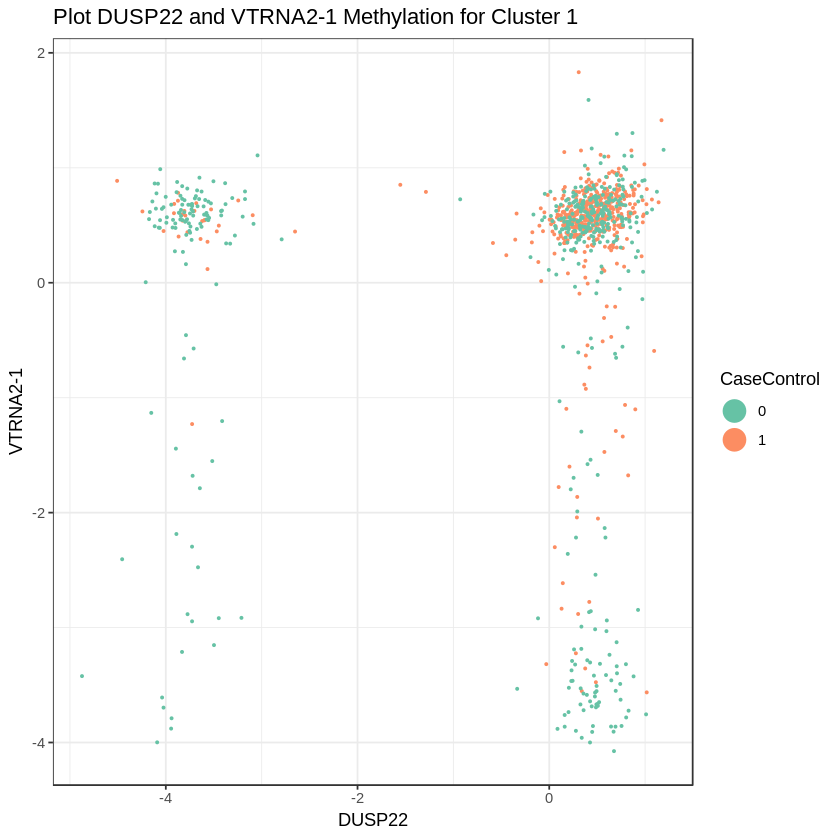

In [15]:

test_VT_DUSP <- cluster1_data[c("DUSP22","CaseControl","VTRNA2.1")]
g <- ggplot(test_VT_DUSP, aes(x=DUSP22, y=VTRNA2.1,colour = CaseControl)) +
geom_point(size=0.45) +
guides(colour=guide_legend(override.aes=list(size=6))) +
xlab("DUSP22") + ylab("VTRNA2-1") +theme_bw()+
ggtitle("Plot DUSP22 and VTRNA2-1 Methylation for Cluster 1") +
scale_colour_brewer(palette = "Set2")
print(g)

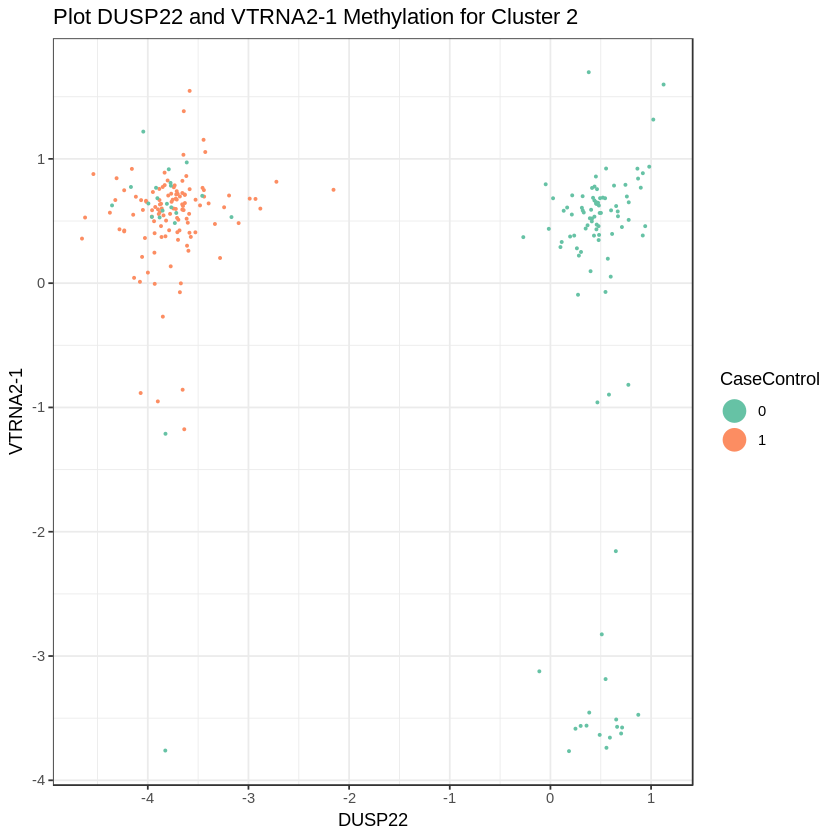

In [16]:
test_VT_DUSP <- cluster2_data[c("DUSP22","CaseControl","VTRNA2.1")]
g <- ggplot(test_VT_DUSP, aes(x=DUSP22, y=VTRNA2.1,colour = CaseControl)) +
geom_point(size=0.45) +
guides(colour=guide_legend(override.aes=list(size=6))) +
xlab("DUSP22") + ylab("VTRNA2-1") +theme_bw()+
ggtitle("Plot DUSP22 and VTRNA2-1 Methylation for Cluster 2") +
scale_colour_brewer(palette = "Set2")
print(g)

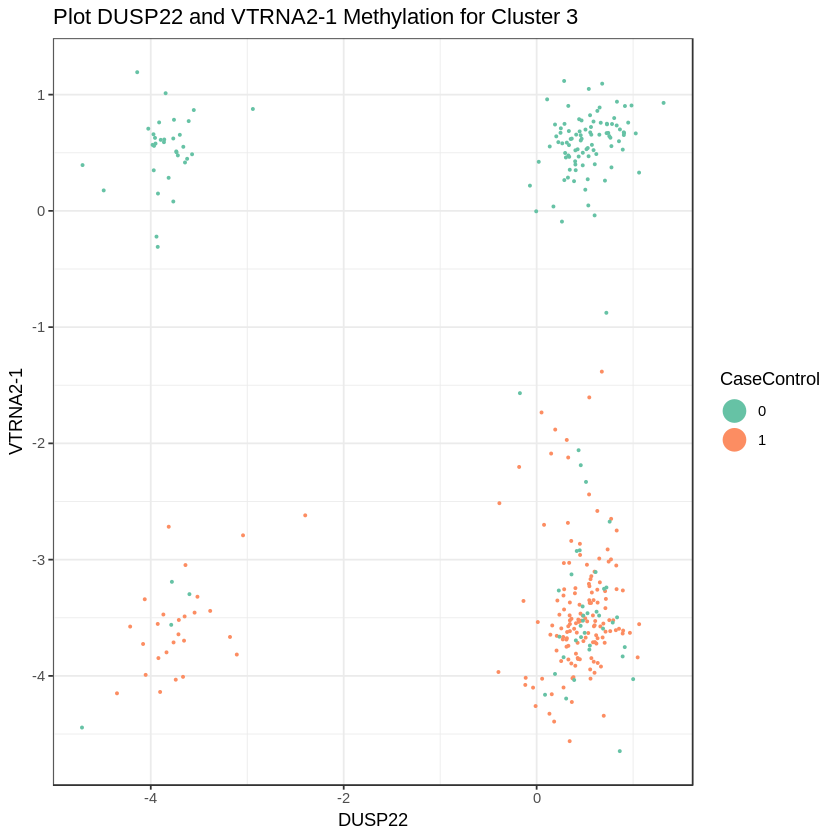

In [18]:
test_VT_DUSP <- cluster3_data[c("DUSP22","CaseControl","VTRNA2.1")]
g <- ggplot(test_VT_DUSP, aes(x=DUSP22, y=VTRNA2.1,colour = CaseControl)) +
geom_point(size=0.45) +
guides(colour=guide_legend(override.aes=list(size=6))) +
xlab("DUSP22") + ylab("VTRNA2-1") +theme_bw()+
ggtitle("Plot DUSP22 and VTRNA2-1 Methylation for Cluster 3") +
scale_colour_brewer(palette = "Set2")
print(g)